<a href="https://colab.research.google.com/github/agu4yh/assignment2/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

This paper is about tidy data, and how to make data cleaning as efficient and easy as possible.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

"The tidy data standard has been designed to facilitate initial exploration and analysis of the data, and to symplify the developement of data analysis tools that work well together."

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

The first scentence means that tidy datasets are cleaned to be organized in the same manner, while messy datasets can be organized in a variety of different ways, making them less predictable and difficult to dive into analysis.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

Values: "usually either numbers (if quantitiative) or strings (if qualitative)."

Variables: "contains all values that measure the same underlying attribute (like height, temperature, duration) across units."

Observations: "contains all values measured on the same unit (like a person, or a day, or a race) across attributes."

  5. How is "Tidy Data" defined in section 2.3?

Tidy data is defined as "the standard way of mapping the meaning of a dataset to it's structure"

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

The 5 most common problems with messy datasets are when column headers are values and not variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, a single observational unit is stored in multiple tables.

The data in table 4 are messy because they use 3 variables (religion, income and freuency) which are stored in both columns and rows.

"Melting" a dataset is the process of tidying it by turning columns into rows. "Melting is parameterised by a list of columns that are already variables, or colvars for short. The other columns are converted into two variables: a new variable called column that contains repeated column headings and a new variable called value that contains the concatenated data values from the previously separate columns."

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 is messy because it has a column for each instance of a day variable (d1, d2, d3, ... etc.). In contrast, table 12 is tidy because each instance of a variable is within it's column, including the day variables.

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

The "chicken-and-egg" problem with focusing on tidy data is that "if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data. This makes it easy to get stuck in a local maxima where independently changing data structures or data tools will not improve workflow."

In the future, Wickham hopes people will "develop even better data storage strategies and better tools" to futher work on the subject of data wrangling.

**Q2.** This question provides some practice cleaning variables which have common problems.
   1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

To clean 'Price', I chose to remove the "," from all the prices and convert to a float in order to filter through the values easier.  I chose to validate "Price" to make sure all values were acceptable, so I ended up with 0 missing values, which can be seen in the code below. 

In [9]:
import pandas as pd

# Load the .csv file
df = pd.read_csv('./data/airbnb_hw.csv')

# Remove non-numeric characters and convert to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Validate the 'Price' column
print(df['Price'].describe())

# Check for missing values in the 'Price' column
df['Price_NA'] = df['Price'].isnull() 
print("number of missing values:")
print(sum(df['Price_NA']),'\n')

# Filter and print values within the specified range
filtered_prices = df[(df['Price'] >= 675) & (df['Price'] <= 1112)]
print(filtered_prices['Price'])

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64
number of missing values:
0 

19        700.0
263      1000.0
680       800.0
792       695.0
1059      800.0
          ...  
30015     900.0
30079     700.0
30287     900.0
30440     850.0
30472     850.0
Name: Price, Length: 277, dtype: float64


   2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.

I combined types that seemed redundant and could be combined like how we discussed in lecture. I chose to replace 'Questionable', 'Unverified' and 'Under investigation' with 'Unconfirmed' and replaced 'Boating', 'Boat' and 'Boatomg' with 'Watercraft'

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('./data/sharks.csv')

# Get unique values in the 'Type' column and print
unique_types = df['Type'].unique()
print("\nTypes before cleaning:")
for types in unique_types:
    print(" " + str(types))
   
# Combine several types into the 'Unconfirmed' type
df['Type'].replace({'Questionable': 'Unconfirmed'}, inplace=True)
df['Type'].replace({'Unverified': 'Unconfirmed'}, inplace=True)
df['Type'].replace({'Under investigation': 'Unconfirmed'}, inplace=True)

# Combine several types into the 'Watercraft' type
df['Type'].replace({'Boating': 'Watercraft'}, inplace=True)
df['Type'].replace({'Boat': 'Watercraft'}, inplace=True)
df['Type'].replace({'Boatomg': 'Watercraft'}, inplace=True)

# Get unique values in the 'Type' column and print
unique_types = df['Type'].unique()
print("\nTypes after cleaning:")
for types in unique_types:
    print(" " + str(types))

   3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
   
I found no missing values initially, but the 9 was a value that didn't make sense in the context of the problem so I used it as the "missing value". That's why I chose to replaced all instances of 9 with 'np.nan'.

In [18]:
import pandas as pd
import numpy as np

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

unique_types = df["WhetherDefendantWasReleasedPretrial"].unique()
for types in unique_types:
    print(types)

df['missing'] = df['WhetherDefendantWasReleasedPretrial'].isnull() 
print("number of missing values:", sum(df['missing']))

# Replace missing values with np.nan
df['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan, inplace=True)

unique_types = df["WhetherDefendantWasReleasedPretrial"].unique()
for types in unique_types:
    print(types)
    
print('\nvalue counts')
print(df["WhetherDefendantWasReleasedPretrial"].value_counts())

9
0
1
number of missing values: 0
nan
0.0
1.0

value counts
1.0    19154
0.0     3801
Name: WhetherDefendantWasReleasedPretrial, dtype: int64


   4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

I changed all the missing values to 0 in order to mock the structure of the `SentenceTypeAllChargesAtConvictionInContactEvent` variable and converted the values to numeric to be analyzed easier later.

In [23]:
import pandas as pd
import numpy as np

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

# the output is very long so I commented it out after analyzing it
#unique_types = df["ImposedSentenceAllChargeInContactEvent"].unique()
#for types in unique_types:
#    print(types)
    
unique_types = df["SentenceTypeAllChargesAtConvictionInContactEvent"].unique()
for types in unique_types:
    print(types)
    
empty_cells_sum = df['ImposedSentenceAllChargeInContactEvent'].isnull().sum()
print("Total number of empty cells:", empty_cells_sum)

# Replace empty cells with NaN
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].replace(' ', 0)

# Convert the column to numeric
df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'], errors='coerce')

9
0
1
4
2
Total number of empty cells: 0


**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

   1. Load the `./data/college_completion.csv` data with Pandas.
   2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
   
The dimensions of the data are 3798 by 63. There are 3798 observations. The variables included are 'index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_enroll_after4_transfer', 'vsa_enroll_elsewhere_after4_transfer', 'vsa_grad_after6_transfer', 'vsa_grad_elsewhere_after6_transfer', 'vsa_enroll_after6_transfer', 'vsa_enroll_elsewhere_after6_transfer', 'similar', 'state_sector_ct', 'carnegie_ct', 'counted_pct', 'nicknames', and 'cohort_size'.
   
   3. Cross tabulate `control` and `level`. Describe the patterns you see.

The pattern I noticed is that more private colleges seem to be at a 4-year level while more public colleges seem to be at a 2-year level.

In [50]:
import pandas as pd

#PART 1:
# Load the data
data = pd.read_csv('./data/college_completion.csv')

#PART 2:
# Check the dimensions of the data
print("Dimensions of the data: ", data.shape)

# Get the number of observations
num_obs = data.shape[0]
print("Number of observations: ", num_obs)

# List the variables included
vars_included = data.columns.tolist()
print("Variables included: ", vars_included)

# Examine the first few rows of data using .head()
print(data.head())

#PART 3:
# Cross-tabulate control and level
cross_tabulate = pd.crosstab(data['control'], data['level'])
print(cross_tabulate)

Dimensions of the data:  (3798, 63)
Number of observations:  3798
Variables included:  ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_af

   4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
   5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
   
In the kernel density plot grouped by `control`, I noticed that the density of public and private for-profit colleges decrease relatively exponentially as the grad_100_value increases while the private not-for-profit's density spikes and decreases within a density range of 0-0.2. In the kernel density plot grouped by `level`, I noticed that the density of the 2-year level starts relatively high and drops in an exponential pattern as the grad_100_value increases while the 4-year level starts at around half the density of the 2-year level and decreases relatively linearly as the grad_100_value increases. 

The private (mainly not-for-profit) institutions with a 4-year level apprear to have better graduation rates.

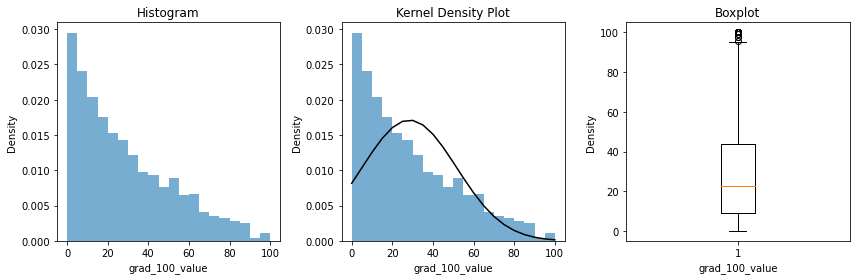

Statistical Description of grad_100_value:
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


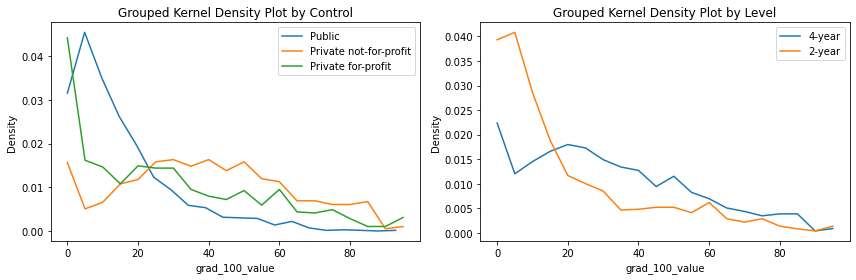

Grouped Statistical Description of grad_100_value by Control:
                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  

Grouped Statistical Description of grad_100_value by Level:
         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


In [57]:
import matplotlib.pyplot as plt
import numpy as np

#PART 4:

# Filter out missing values in grad_100_value
grad_filtered = data['grad_100_value'].dropna()

# Histogram
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(grad_filtered, bins=20, density=True, alpha=0.6)
plt.title('Histogram')
plt.xlabel('grad_100_value')  
plt.ylabel('Density')

# Kernel density plot
plt.subplot(132)
density, bins, _ = plt.hist(grad_filtered, bins=20, density=True, alpha=0.6)
plt.plot(bins, np.exp(-((bins - grad_filtered.mean())**2) / (2 * grad_filtered.std()**2)) / (grad_filtered.std() * np.sqrt(2 * np.pi)), 'k')
plt.title('Kernel Density Plot')
plt.xlabel('grad_100_value')  
plt.ylabel('Density')

# Boxplot
plt.subplot(133)
plt.boxplot(grad_filtered)
plt.title('Boxplot')
plt.xlabel('grad_100_value')  
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Statistical description
grad_stats = grad_filtered.describe()
print("Statistical Description of grad_100_value:")
print(grad_stats)

#PART 5:

# Grouped kernel density plot by control
plt.figure(figsize=(12, 4))
plt.subplot(121)
for control in data['control'].unique():
    control_data = grad_filtered[data['control'] == control]
    density, bins = np.histogram(control_data, bins=20, density=True)
    plt.plot(bins[:-1], density, label=control)
plt.legend()
plt.title('Grouped Kernel Density Plot by Control')
plt.xlabel('grad_100_value') 
plt.ylabel('Density')        

# Grouped kernel density plot by level
plt.subplot(122)
for level in data['level'].unique():
    level_data = grad_filtered[data['level'] == level]
    density, bins = np.histogram(level_data, bins=20, density=True)
    plt.plot(bins[:-1], density, label=level)
plt.legend()
plt.title('Grouped Kernel Density Plot by Level')
plt.xlabel('grad_100_value') 
plt.ylabel('Density')   

plt.tight_layout()
plt.show()

# Grouped statistical description by control
control_group = grad_filtered.groupby(data['control']).describe()
print("Grouped Statistical Description of grad_100_value by Control:")
print(control_group)

# Grouped statistical description by level
level_group = grad_filtered.groupby(data['level']).describe()
print("\nGrouped Statistical Description of grad_100_value by Level:")
print(level_group)

   6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
   
Private not-for profit institutions of the 2-year and 4-year levels appear to have better graduation rates.
   
   7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
   
Besides the Private not-for-profit 4-year institution, the other institution types generally peak at an aid value around 50000, which explains the bi-mo9dal nature of the graph.
   
   8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?
   
For the scatterplot of `grad_100_value` by `aid_value`, I noticed that lower aid_value generally corresponds to a lower grad_100_value. As the aid_value increases, the grad_100_values increases but in sparcity. 
Aid seems to increase graduation rates for 4-year, private not-for-profit institutions.

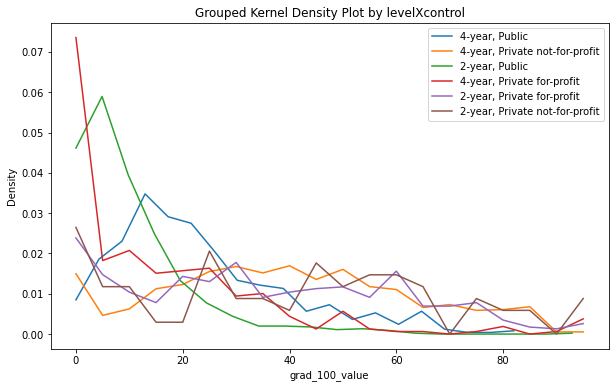

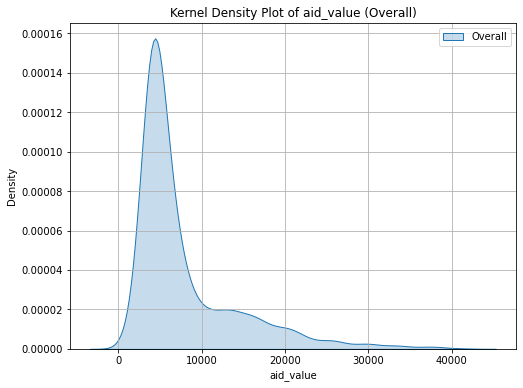

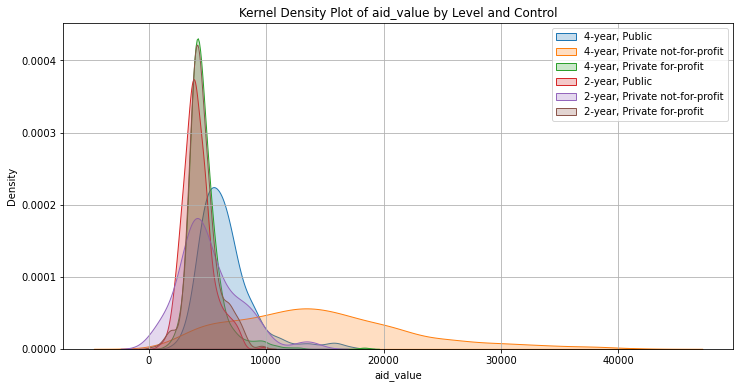

Grouped Statistical Description of aid_value by Level and Control:
                                count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5 

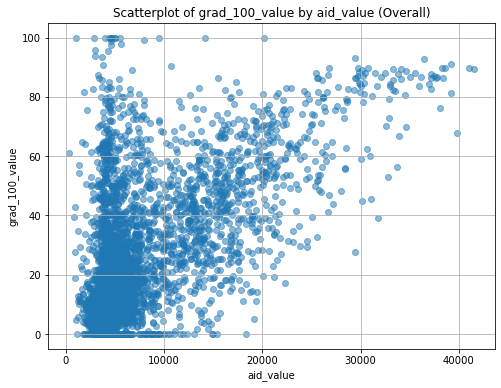

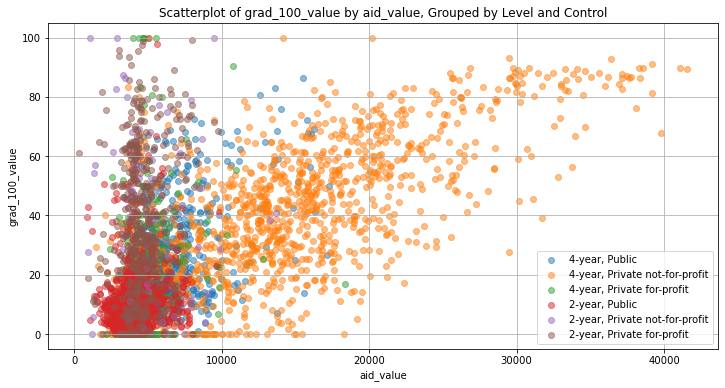

In [64]:
import matplotlib.pyplot as plt
import numpy as np
#PART 6:

# Load the data
data = pd.read_csv('./data/college_completion.csv')

# Filter out missing values in grad_100_value
grad_filtered = data['grad_100_value'].dropna()  

data['levelXcontrol'] = data['level'] + ', ' + data['control']

# Grouped kernel density plot by 'levelXcontrol'
plt.figure(figsize=(10, 6))
for level_control_group in data['levelXcontrol'].unique():
    group_data = grad_filtered[data['levelXcontrol'] == level_control_group]
    density, bins = np.histogram(group_data, bins=20, density=True)
    plt.plot(bins[:-1], density, label=level_control_group)

plt.legend()
plt.title('Grouped Kernel Density Plot by levelXcontrol')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()

#PART 7:

# Create a kernel density plot of aid_value
plt.figure(figsize=(8, 6))
plt.title('Kernel Density Plot of aid_value (Overall)')
plt.xlabel('aid_value')
plt.ylabel('Density')

sns.kdeplot(data['aid_value'], shade=True, label='Overall')
plt.legend()
plt.grid(True)

plt.show()

# Grouped kernel density plot by level and control
plt.figure(figsize=(12, 6))
plt.title('Kernel Density Plot of aid_value by Level and Control')
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.grid(True)

for level in data['level'].unique():
    for control in data['control'].unique():
        subset = data[(data['level'] == level) & (data['control'] == control)]
        if len(subset) > 0:
            sns.kdeplot(subset['aid_value'], shade=True, label=f'{level}, {control}')

plt.legend()
plt.show()

# Grouped statistical description by level and control
grouped_stats = data.groupby(['level', 'control'])['aid_value'].describe()
print("Grouped Statistical Description of aid_value by Level and Control:")
print(grouped_stats)

#PART 8:

# Scatterplot of grad_100_value by aid_value
plt.figure(figsize=(8, 6))
plt.title('Scatterplot of grad_100_value by aid_value (Overall)')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')

plt.scatter(data['aid_value'], data['grad_100_value'], alpha=0.5)
plt.grid(True)
plt.show()

# Scatterplot of grad_100_value by aid_value, grouped by level then control
plt.figure(figsize=(12, 6))
plt.title('Scatterplot of grad_100_value by aid_value, Grouped by Level and Control')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')

for level in data['level'].unique():
    for control in data['control'].unique():
        subset = data[(data['level'] == level) & (data['control'] == control)]
        if len(subset) > 0:
            plt.scatter(subset['aid_value'], subset['grad_100_value'], label=f'{level}, {control}', alpha=0.5)

plt.legend()
plt.grid(True)
plt.show()

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  
The dimensions of the data are 30478 by 13. There are 30478 observations. The variables included 'Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', and 'Review Scores Rating'.
  
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  
I noticed that the rental type that is most available is apartments and the room types that are generally more available is the entire apt/home or a private room. Private rooms are more common than renting the entire property for bed & beakfasts, castles, chalets, dorms, houses, huts, tests, townhouses, and others.

In [3]:
import pandas as pd

# PART 1:

# Load the Airbnb data
df = pd.read_csv("./data/airbnb_hw.csv")

# Clean the 'Price' column
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# PART 2:

# Dimensions of the data
print("Dimensions of the data:", df.shape)

# Number of observations
num_observations = len(df)
print("Number of observations:", num_observations)

# Variables included
variables = df.columns.tolist()
print("Variables included:", variables)

# Examine the first few rows of data
print(df.head())

# PART 3:

# Create a cross-tabulation of Room Type and Property Type
cross_tabulate = pd.crosstab(df['Room Type'], df['Property Type'])
print(cross_tabulate)

Dimensions of the data: (30478, 13)
Number of observations: 30478
Variables included: ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Ap

  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  
The data are badly scaled because the range is too large. There don't appear to be many outliers.

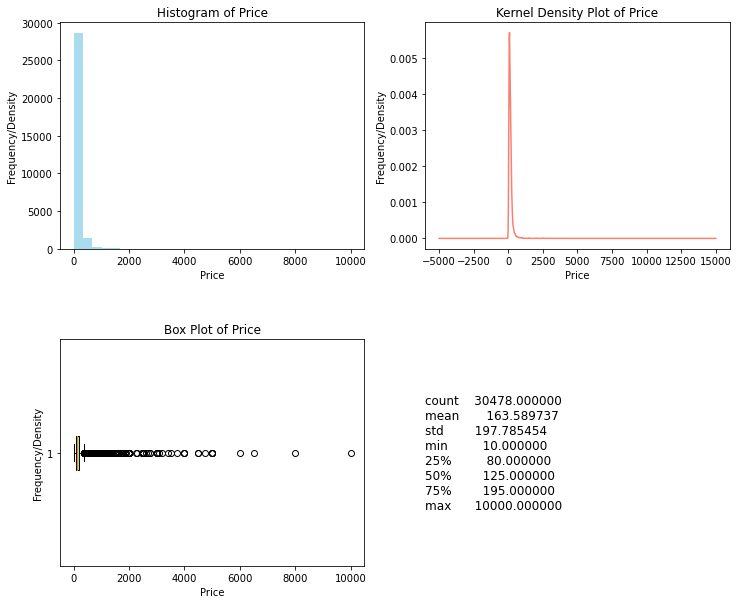

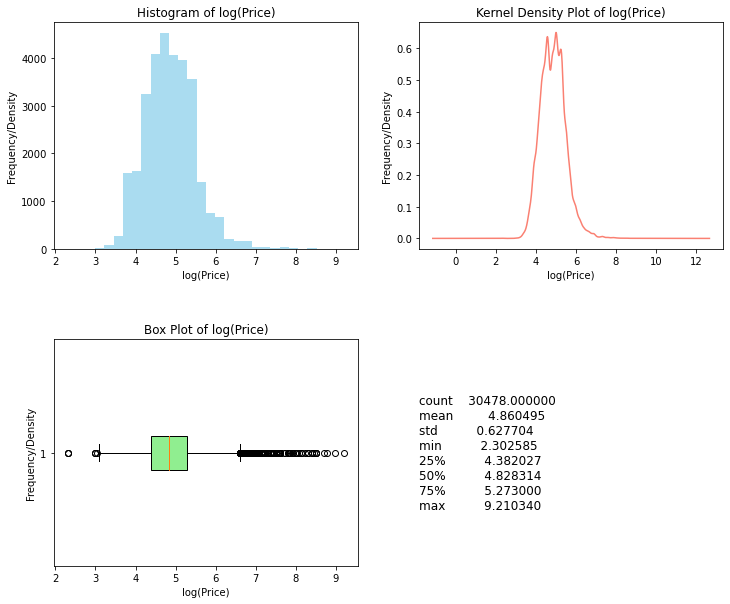

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./data/airbnb_hw.csv")

# Clean the 'Price' column
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# PART 4:

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

# Histogram
axes[0, 0].hist(df['Price'], bins=30, color='skyblue', alpha=0.7)
axes[0, 0].set_title('Histogram of Price')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

# Kernel Density Plot
df['Price'].plot(kind='kde', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Kernel Density Plot of Price')
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('Density')

# Box Plot
axes[1, 0].boxplot(df['Price'], vert=False, patch_artist=True, boxprops={'facecolor': 'lightgreen'})
axes[1, 0].set_title('Box Plot of Price')
axes[1, 0].set_xlabel('Price')

# Statistical Description
stats_description = df['Price'].describe()
axes[1, 1].axis('off')
axes[1, 1].text(0, 0.5, stats_description.to_string(), fontsize=12, verticalalignment='center')

# Log-transform 'Price'
df['Price_log'] = np.log(df['Price'])

# Create a figure with subplots for log-transformed data
fig2, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

# Histogram of log-transformed Price
axes2[0, 0].hist(df['Price_log'], bins=30, color='skyblue', alpha=0.7)
axes2[0, 0].set_title('Histogram of log(Price)')
axes2[0, 0].set_xlabel('log(Price)')
axes2[0, 0].set_ylabel('Frequency')

# Kernel Density Plot of log-transformed Price
df['Price_log'].plot(kind='kde', ax=axes2[0, 1], color='salmon')
axes2[0, 1].set_title('Kernel Density Plot of log(Price)')
axes2[0, 1].set_xlabel('log(Price)')
axes2[0, 1].set_ylabel('Density')

# Box Plot of log-transformed Price
axes2[1, 0].boxplot(df['Price_log'], vert=False, patch_artist=True, boxprops={'facecolor': 'lightgreen'})
axes2[1, 0].set_title('Box Plot of log(Price)')
axes2[1, 0].set_xlabel('log(Price)')

# Statistical Description of log-transformed Price
stats_description_log = df['Price_log'].describe()
axes2[1, 1].axis('off')
axes2[1, 1].text(0, 0.5, stats_description_log.to_string(), fontsize=12, verticalalignment='center')

# axis labels
for ax in axes.flatten():
    ax.set_xlabel('Price')
    ax.set_ylabel('Frequency/Density')

for ax in axes2.flatten():
    ax.set_xlabel('log(Price)')
    ax.set_ylabel('Frequency/Density')
plt.show()


 5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
 
In the scatterplot of `price_log` and `Beds`, I noticed that the variation is price is larger for less Beds. The average price generally increases as Bed increases. The standard deviation in prices generally increases as Bends increases until 5 beds, but it varies afterwords. For both average price and standard deviation in prices, there is a major spike/increase for 12 Beds.

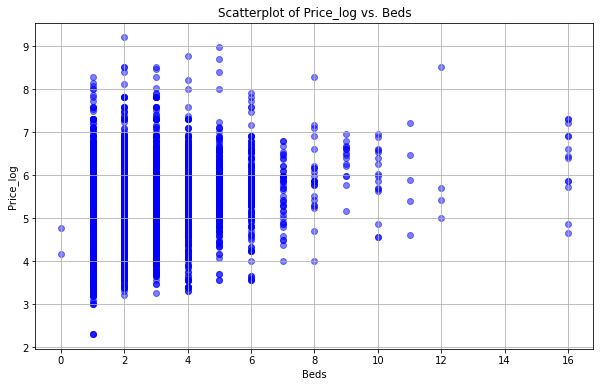

    Beds  Average_Price  Std_Deviation  Count
0    0.0      92.000000      38.183766      2
1    1.0     127.673810     107.047827  20344
2    2.0     199.061271     225.706318   6610
3    3.0     268.118300     303.106942   2071
4    4.0     315.332056     353.184402    783
5    5.0     411.500000     672.610659    284
6    6.0     401.768362     417.018431    177
7    7.0     341.377778     220.116631     45
8    8.0     589.041667     793.054934     24
9    9.0     618.000000     233.649616     15
10  10.0     480.187500     296.820534     16
11  11.0     535.800000     499.217588      5
12  12.0    1418.750000    2388.285211      4
13  16.0     736.000000     496.804287     13


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Airbnb data
df = pd.read_csv("./data/airbnb_hw.csv")

# Clean the 'Price' column
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Log-transform 'Price' to create 'Price_log'
df['Price_log'] = np.log(df['Price'])

# PART 5:

# Create a scatterplot of Price_log and Beds
plt.figure(figsize=(10, 6))
plt.scatter(df['Beds'], df['Price_log'], alpha=0.5, color='blue')
plt.title('Scatterplot of Price_log vs. Beds')
plt.xlabel('Beds')
plt.ylabel('Price_log')
plt.grid(True)
plt.show()

# Group by the number of beds and compute average price and standard deviation
beds_grouped = df.groupby('Beds')['Price'].agg(['mean', 'std', 'count']).reset_index()
beds_grouped.rename(columns={'mean': 'Average_Price', 'std': 'Std_Deviation', 'count': 'Count'}, inplace=True)
print(beds_grouped)


6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

The colored scatterplots show that shared rooms have a lower price for Beds while they have a higher price for the entire home/apt with private rooms somewhere in the middle. For property types, I noticed that lofts have relatively high range of prices for smaller number of Beds and for houses, the price generally increases as the number of Beds increase before the data becomes pretty scattered past 8 Beds. The other room type and entire house/apt property type have the highest prices on average and the highest standard deviation. The median appears to be a more reliable estimate of central tendency because the data is skewed to the left and has many outliers.

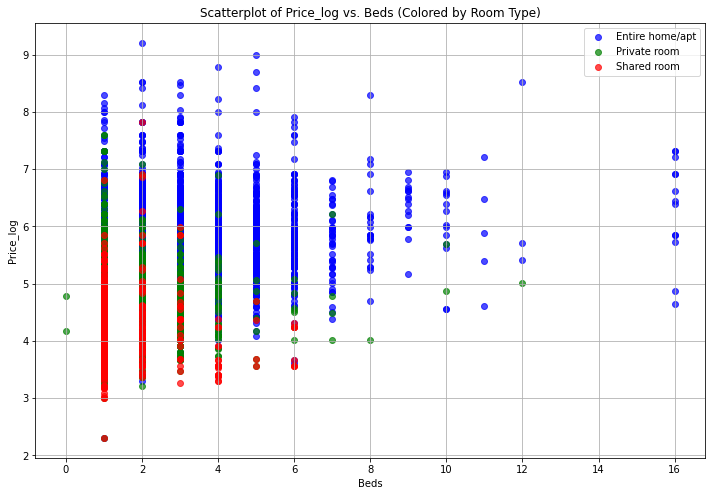

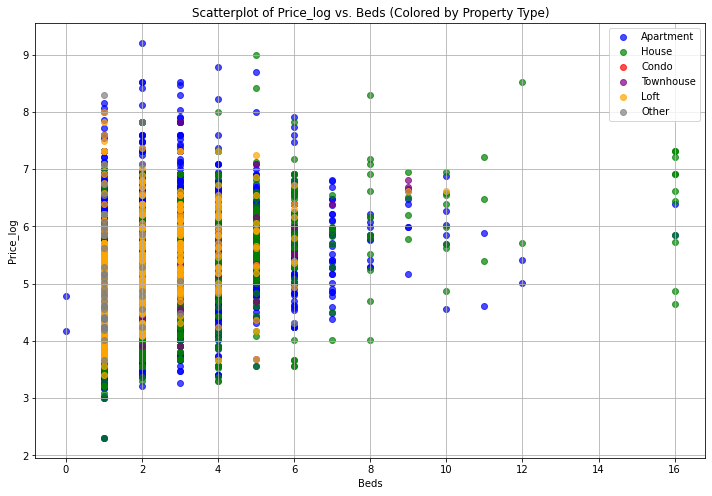

          Room Type    Property Type  Average_Price  Std_Deviation
0   Entire home/apt        Apartment     213.224839     218.097834
1   Entire home/apt  Bed & Breakfast     184.538462     119.814172
2   Entire home/apt             Boat     158.428571      51.110524
3   Entire home/apt         Bungalow     150.750000      46.464144
4   Entire home/apt            Cabin     250.000000            NaN
5   Entire home/apt        Camper/RV     114.333333     107.685963
6   Entire home/apt      Condominium     304.861111     266.197497
7   Entire home/apt             Dorm      44.250000      24.060687
8   Entire home/apt            House     297.263298     468.409428
9   Entire home/apt       Lighthouse      39.000000            NaN
10  Entire home/apt             Loft     330.510204     321.519721
11  Entire home/apt            Other     843.428571    1133.062271
12  Entire home/apt        Townhouse     280.783133     314.605252
13  Entire home/apt            Villa     529.750000     650.96

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Airbnb data
df = pd.read_csv("./data/airbnb_hw.csv")

# Clean the 'Price' column
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Log-transform 'Price' to create 'Price_log'
df['Price_log'] = np.log(df['Price'])

# PART 6:

# Choose colors for Room Type and Property Type
room_type_colors = {
    'Entire home/apt': 'blue',
    'Private room': 'green',
    'Shared room': 'red'
}

property_type_colors = {
    'Apartment': 'blue',
    'House': 'green',
    'Condo': 'red',
    'Townhouse': 'purple',
    'Loft': 'orange',
    'Other': 'gray'
}

# Create a scatterplot of Price_log and Beds colored by Room Type
plt.figure(figsize=(12, 8))
for room_type, color in room_type_colors.items():
    subset = df[df['Room Type'] == room_type]
    plt.scatter(subset['Beds'], subset['Price_log'], label=room_type, c=color, alpha=0.7)

plt.title('Scatterplot of Price_log vs. Beds (Colored by Room Type)')
plt.xlabel('Beds')
plt.ylabel('Price_log')
plt.grid(True)
plt.legend()
plt.show()

# Create a scatterplot of Price_log and Beds, colored by Property Type
plt.figure(figsize=(12, 8))
for property_type, color in property_type_colors.items():
    subset = df[df['Property Type'] == property_type]
    plt.scatter(subset['Beds'], subset['Price_log'], label=property_type, c=color, alpha=0.7)

plt.title('Scatterplot of Price_log vs. Beds (Colored by Property Type)')
plt.xlabel('Beds')
plt.ylabel('Price_log')
plt.grid(True)
plt.legend()
plt.show()

# Group by Room Type and Property Type and compute average price and standard deviation
grouped = df.groupby(['Room Type', 'Property Type'])['Price'].agg(['mean', 'std']).reset_index()
grouped.rename(columns={'mean': 'Average_Price', 'std': 'Std_Deviation'}, inplace=True)

# Display the grouped description
print(grouped)

# Find Room Type and Property Type with the highest average price
max_avg_price = grouped[grouped['Average_Price'] == grouped['Average_Price'].max()]
print("\nRoom Type and Property Type with the highest average price:")
print(max_avg_price)

# Find Room Type and Property Type with the highest standard deviation
max_std_deviation = grouped[grouped['Std_Deviation'] == grouped['Std_Deviation'].max()]
print("\nRoom Type and Property Type with the highest standard deviation:")
print(max_std_deviation)

  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?
  
The data appears to be distributed between a price_log of 3.5 and 6 and 0 to 4 Beds. This makes me think that the plots in 5 and 6 make it appear like there is a greater variation in prices and Beds than there actually is since the data looks less condensed.

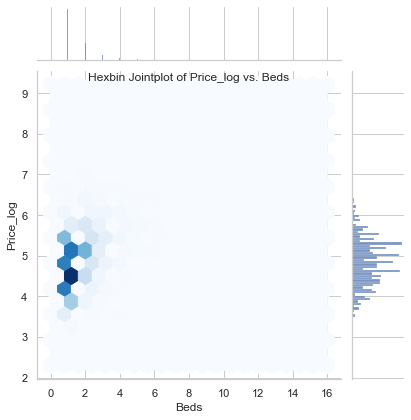

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Airbnb data
df = pd.read_csv("./data/airbnb_hw.csv")

# Clean the 'Price' column
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Log-transform 'Price' to create 'Price_log'
df['Price_log'] = np.log(df['Price'])

# Create a jointplot with kind='hex' and custom formatting
sns.set(style="whitegrid")  # Set the style to whitegrid
g = sns.jointplot(data=df, x='Beds', y='Price_log', kind='hex', cmap='Blues', joint_kws={'gridsize': 20})
g.ax_joint.set_title('Hexbin Jointplot of Price_log vs. Beds', loc='center', pad=-10)  # Adjust title placement and top margin
plt.show()

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

   1. How did the most recent US Census gather data on race?
   
People self-identified by selecting either White, Black or African American, Asian, Native American or Alaska Native, Native Hawaiian or Other Pacific Islander, or Some Other Race, or a combination. Hispanic or Latino origin was set as a seperate option.
   
   2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
   
We gather this data for a general idea of the demographics and how to respond to it. This kinds of data effects politics and society through factors like political representation and resource allocation. Data quality matters because these political and societal factors will be effected incorrect data, meaning a potential loss in money and representation among other issues.
   
   3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
   
I think the Census did a good job trying to be inclusive by allowing people to select more than one race and including minorities. However, it could be more specific instead of general gloabl areas. For example, instead of asking if you are Asian, the survey could allow you to specify Indian, Chinese, Korean, etc. to be more representative and better reflect the diversity of the population. By highlighting the various groups within each self-identification option, the Census can gather richer and more useful data.
   
   4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
   
People can self-identify as male or female. The Census does make it easier by requesting for general biological gender, but that could offend people with different gender identities. That's why I think the Census should offer various options for people who identify as non-binary, genderfluid, etc. to have more accurate, richer and more useful data.
   
   5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
   
Other than privacy concerns, protected characteristics can result in biased and innaccurate results since any analysis of the data would not accurately represent the categorization of every individual. This issue would also be enhanced by missing values because those data are not being accurately interpretend in analysis. Good practices would inclead ethically and fairly cleaning and analysing the data to avoid bias, and bad practices would include using bias and ignoring missing values in analysis.
   
   6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?
   
As mentioned in prevoius questions, I would be concerned about the accuracy of the data such as its interaction with missing values, and about bias in terms of dealing with minorities and outliers.

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

    1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
    2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
    
The graph shows that as the income decible increases, the individual income taxes increase (they have a direct relationship). Some values are negative because some people probably received tax deductions/credits that were greater than the their original tax amount.
    
    3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
    
Deciles 10 to 20 and 20 to 30 are paying net negative amounts and the rest are paying net positive amounts.

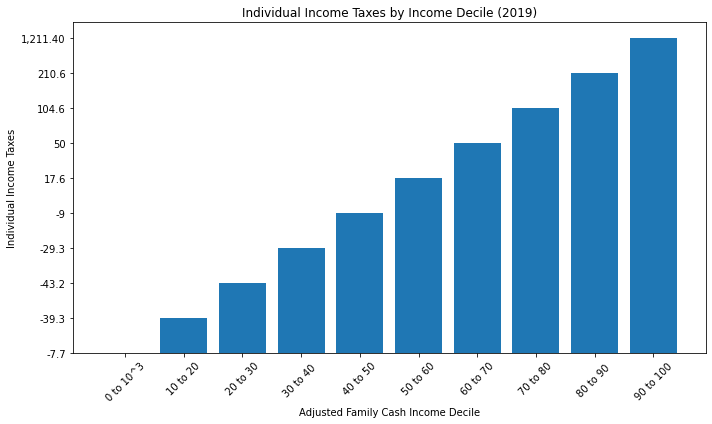

Deciles with net positive Total Federal Taxes:
0    0 to 10^3
3    30 to 40 
4     40 to 50
5     50 to 60
6     60 to 70
7     70 to 80
8    80 to 90 
Name: Adjusted Family Cash Income Decile, dtype: object

Deciles with net negative Total Federal Taxes:
1    10 to 20
2    20 to 30
Name: Adjusted Family Cash Income Decile, dtype: object


In [5]:
# PART 1:

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('./data/Millions_of_Families_and_Billions_of_Dollars.csv')

# Convert 'Total Federal Taxes' column to numeric
#data['Total Federal Taxes'] = pd.to_numeric(data['Total Federal Taxes'], errors='coerce')
# get rid of commas in data
data['Total Federal Taxes'] = data['Total Federal Taxes'].replace(',', '').astype(float)

# PART 2:

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(data['Adjusted Family Cash Income Decile'], data['Individual Income Taxes '])
plt.xlabel('Adjusted Family Cash Income Decile')
plt.ylabel('Individual Income Taxes')
plt.title('Individual Income Taxes by Income Decile (2019)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# PART 3:

# Identify net positive and net negative deciles
positive_deciles = data[data['Total Federal Taxes'] >= 0]['Adjusted Family Cash Income Decile']
negative_deciles = data[data['Total Federal Taxes'] < 0]['Adjusted Family Cash Income Decile']

print("Deciles with net positive Total Federal Taxes:")
print(positive_deciles)

print("\nDeciles with net negative Total Federal Taxes:")
print(negative_deciles)

   4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
   
Payroll taxes and excise and customes duties show a clear pattern of increasing overtime, same for individual income taxes between 60 to 90 deciles. Excises and gift taxes only exist for the 90 to 100 decile. This data would be easier to analyze if it was melted.

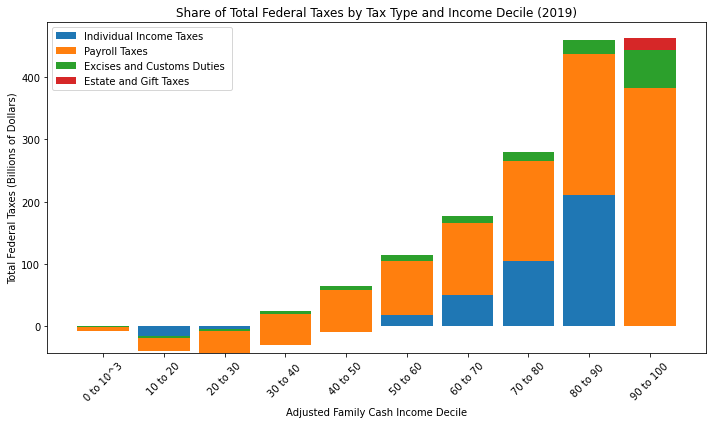

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('./data/Millions_of_Families_and_Billions_of_Dollars.csv')

# Convert all used columns to float and get rid of commas
columns = ['Individual Income Taxes ', 'Payroll Taxes ', 'Excises and Customs Duties ', 'Estate and Gift Taxes']
for col in columns:
    data[col] = data[col].replace(',', '')
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Create a DataFrame for plotting
tax_data = data[['Adjusted Family Cash Income Decile'] + columns]

# Group the data by income decile and calculate the sum of taxes for each category
tax_data_grouped = tax_data.groupby('Adjusted Family Cash Income Decile').sum().reset_index()

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.85
bottom = 0

for col in columns:
    plt.bar(
        tax_data_grouped['Adjusted Family Cash Income Decile'],
        tax_data_grouped[col],
        label=col,
        width=bar_width,
        bottom=bottom
    )
    bottom += tax_data_grouped[col]

plt.xlabel('Adjusted Family Cash Income Decile')
plt.ylabel('Total Federal Taxes (Billions of Dollars)')
plt.title('Share of Total Federal Taxes by Tax Type and Income Decile (2019)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

   5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
   
The pattern for payroll taxes and excises and customs duties is less clear for the richer population. The top .1 decile also has estate and gift taxes. Individual income taxes cotinues to show a relative increase across richer deciles.

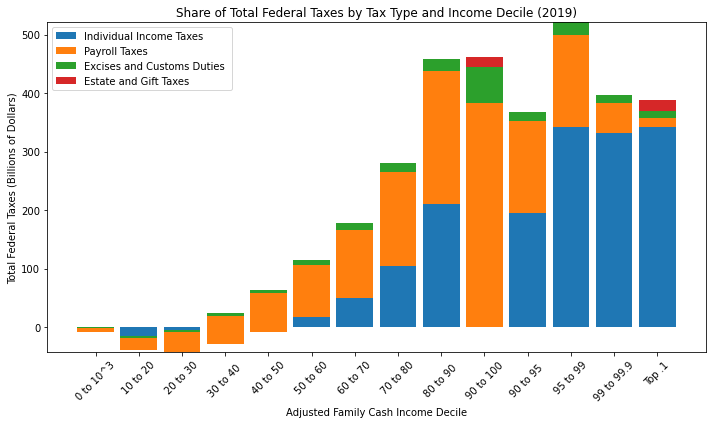

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('./data/Millions_of_Families_and_Billions_of_Dollars_With_Rich.csv')

# Convert all used columns to float and get rid of commas
columns = ['Individual Income Taxes ', 'Payroll Taxes ', 'Excises and Customs Duties ', 'Estate and Gift Taxes']
for col in columns:
    data[col] = data[col].replace(',', '')
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Create a DataFrame for plotting
tax_data = data[['Adjusted Family Cash Income Decile'] + columns]

# Group the data by income decile and calculate the sum of taxes for each category
tax_data_grouped = tax_data.groupby('Adjusted Family Cash Income Decile').sum().reset_index()

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.85
bottom = 0

for col in columns:
    plt.bar(
        tax_data_grouped['Adjusted Family Cash Income Decile'],
        tax_data_grouped[col],
        label=col,
        width=bar_width,
        bottom=bottom
    )
    bottom += tax_data_grouped[col]

plt.xlabel('Adjusted Family Cash Income Decile')
plt.ylabel('Total Federal Taxes (Billions of Dollars)')
plt.title('Share of Total Federal Taxes by Tax Type and Income Decile (2019)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

   6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
   7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
   
According to the provided data, the U.S. tax system does seem progressive in terms of amount paid and percentage of the overall total.
   
   8. Do the rich pay enough in taxes? Defend your answer.
   
I think the rich do pay enough taxes until the 100th decile, as can be seen from the graph below. However, from the 100th decile to the top .1 percent, they do not pay as high of a percentage, but their total federal taxes are still very large compared to lower groups. I think that it is fair that the rich still pay much more taxes but not insanely high amounts just because they have more money.

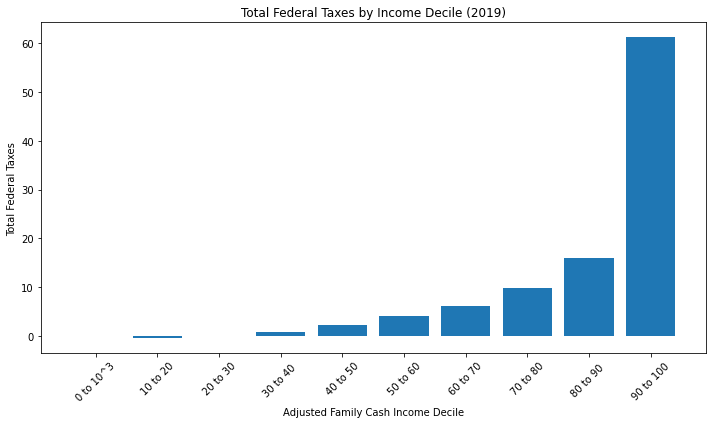

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('./data/Percent_Distribution.csv')

# Remove commas and convert 'Individual Income Taxes' to float
data['Total Federal Taxes'] = data['Total Federal Taxes'].replace(',', '').astype(float)

# Convert 'Total Federal Taxes' to float
data['Total Federal Taxes'] = pd.to_numeric(data['Total Federal Taxes'], errors='coerce')

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(data['Adjusted Family Cash Income Decile'], data['Total Federal Taxes'])
plt.xlabel('Adjusted Family Cash Income Decile')
plt.ylabel('Total Federal Taxes')
plt.title('Total Federal Taxes by Income Decile (2019)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()